In [1]:
pip install mesa

     |████████████████████████████████| 675kB 8.8MB/s 
     |████████████████████████████████| 51kB 8.4MB/s 


In [2]:
from mesa import Agent, Model
from mesa.time import RandomActivation
import random
from mesa.datacollection import DataCollector

%matplotlib inline
import matplotlib
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

class MoneyAgent(Agent):
    """ An agent with fixed initial wealth."""
    def __init__(self, unique_id, model):
        super().__init__(unique_id, model)
        self.opinion = random.randint(-5, 5) # random possitive or negative opinion -5 to 5
        self.name = unique_id
        self.neighbors = []

    def positive_influence(self):
        #affect only neighbors
        for i in range(len(self.neighbors)):
          other_agent = self.neighbors[i]
          if other_agent.opinion < 0: #if negative opinion -> influence
            other_agent.opinion += 1

    def negative_influence(self):
        for i in range(len(self.neighbors)):
          other_agent = self.neighbors[i]
          if other_agent.opinion > 0: #if positive opinion -> influence
            other_agent.opinion -= 1

    def step(self):
        #recompute neighbors in each step (useful if network N increases)
        graph_n = [n for n in REG.neighbors(self.name)]
        nei_list=[]
        agents = self.model.schedule.agents
        for j in range(N):
          if agents[j].name in graph_n:
            nei_list.append(agents[j])
        self.neighbors = nei_list
        #influnce
        if self.opinion == 0:
            return
        if self.opinion > 0:
            self.positive_influence()
        if self.opinion < 0:
            self.negative_influence()

class MoneyModel(Model):
    """A model with some number of agents."""
    def __init__(self, N):
        self.num_agents = N
        self.schedule = RandomActivation(self)
        # Create agents
        for i in range(self.num_agents):
            a = MoneyAgent(i, self)
            self.schedule.add(a)
        self.datacollector = DataCollector(
            agent_reporters={"Opinion": "opinion"})

    def step(self):
        '''Advance the model by one step.'''
        self.datacollector.collect(self)
        self.schedule.step()

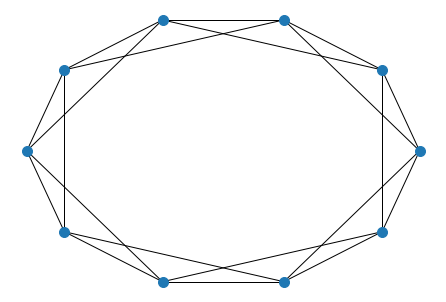

In [3]:
#Define Model
N=10 #nodes
d = 4 #connections
REG = nx.watts_strogatz_graph(N, d, 0)
nx.draw_circular(REG,node_size=100)

model = MoneyModel(N)
for i in range(2):
  model.step()

In [4]:
agent_opinion = model.datacollector.get_agent_vars_dataframe()
agent_opinion.head(n=20)

Opinion
Step AgentID         
0    0              2
     1             -2
     2             -2
     3             -2
     4              3
     5              0
     6             -4
     7              4
     8              3
     9             -3
1    0              0
     1             -1
     2              0
     3             -1
     4              0
     5              0
     6             -1
     7              2
     8              1
     9              0

Text(0, 0.5, 'Number of Agends')

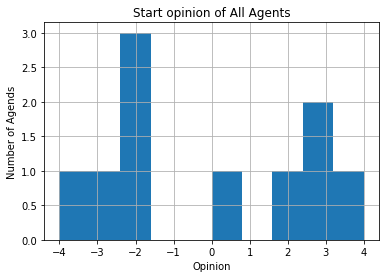

In [5]:
import matplotlib.pyplot as plt

start_opinion = agent_opinion.xs(0, level="Step")["Opinion"]
start_opinion.hist()
plt.title("Start opinion of All Agents")
plt.xlabel("Opinion")
plt.ylabel("Number of Agends")

Text(0, 0.5, 'Number of Agends')

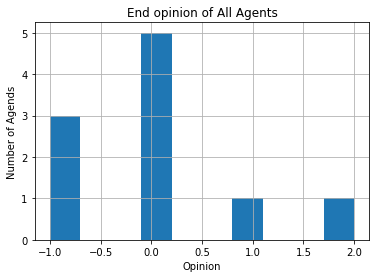

In [6]:
end_opinion = agent_opinion.xs(1, level="Step")["Opinion"]
end_opinion.hist()
plt.title("End opinion of All Agents")
plt.xlabel("Opinion")
plt.ylabel("Number of Agends")